In [1]:

import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import os
from collections import OrderedDict


In [2]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [36]:
df=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/week3.csv")

In [37]:
df.head(50)

,Date,Unnamed: 0,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,...,Day_perc_change,Trend,Close_price,21_day_SMA,34_day_SMA,Trade_Call,14days_sma,14days_std,14days_bollinger_upper,14days_bollinger_lower
0,15-05-2017,0,TCS,EQ,15-05-2017,2360.65,2375.10,2377.95,2341.60,2368.00,...,0.000000,Slight or No change,2365.10,NaN,NaN,HODL,NaN,NaN,NaN,NaN
1,16-05-2017,1,TCS,EQ,16-05-2017,2365.10,2380.00,2435.00,2373.45,2425.10,...,2.708131,positive,2429.15,NaN,NaN,HODL,NaN,NaN,NaN,NaN
2,17-05-2017,2,TCS,EQ,17-05-2017,2429.15,2433.50,2460.75,2423.00,2450.00,...,1.078567,positive,2455.35,NaN,NaN,HODL,NaN,NaN,NaN,NaN
3,18-05-2017,3,TCS,EQ,18-05-2017,2455.35,2450.00,2572.00,2442.25,2525.00,...,3.292810,Among top gainers,2536.20,NaN,NaN,HODL,NaN,NaN,NaN,NaN
4,19-05-2017,4,TCS,EQ,19-05-2017,2536.20,2536.20,2540.55,2486.00,2503.85,...,-1.145414,negative,2507.15,NaN,NaN,HODL,NaN,NaN,NaN,NaN
5,22-05-2017,5,TCS,EQ,22-05-2017,2507.15,2510.00,2553.75,2510.00,2535.00,...,0.965239,Slight positive,2531.35,NaN,NaN,HODL,NaN,NaN,NaN,NaN
6,23-05-2017,6,TCS,EQ,23-05-2017,2531.35,2533.20,2564.15,2514.00,2523.70,...,-0.381220,Slight or No change,2521.70,NaN,NaN,HODL,NaN,NaN,NaN,NaN
7,24-05-2017,7,TCS,EQ,24-05-2017,2521.70,2534.80,2570.00,2529.65,2567.10,...,1.485109,positive,2559.15,NaN,NaN,HODL,NaN,NaN,NaN,NaN
8,25-05-2017,8,TCS,EQ,25-05-2017,2559.15,2577.00,2637.55,2568.00,2615.05,...,2.557490,positive,2624.60,NaN,NaN,HODL,NaN,NaN,NaN,NaN
9,26-05-2017,9,TCS,EQ,26-05-2017,2624.60,2625.00,2626.85,2564.65,2570.05,...,-1.765983,negative,2578.25,NaN,NaN,HODL,NaN,NaN,NaN,NaN


In [38]:
df["14_day_SMA"] = df['Close Price'].rolling(14).mean()
df["14_day_STD"] = df['Close Price'].rolling(14).std()
df["14_day_bollinger_upper"] = df["14_day_SMA"] + df["14_day_STD"] * 2
df["14_day_bollinger_lower"] = df["14_day_SMA"] - df["14_day_STD"] * 2

In [39]:
df

,Date,Unnamed: 0,Symbol,Series,Date.1,Prev Close,Open Price,High Price,Low Price,Last Price,...,34_day_SMA,Trade_Call,14days_sma,14days_std,14days_bollinger_upper,14days_bollinger_lower,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower
0,15-05-2017,0,TCS,EQ,15-05-2017,2360.65,2375.10,2377.95,2341.60,2368.00,...,NaN,HODL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16-05-2017,1,TCS,EQ,16-05-2017,2365.10,2380.00,2435.00,2373.45,2425.10,...,NaN,HODL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17-05-2017,2,TCS,EQ,17-05-2017,2429.15,2433.50,2460.75,2423.00,2450.00,...,NaN,HODL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-05-2017,3,TCS,EQ,18-05-2017,2455.35,2450.00,2572.00,2442.25,2525.00,...,NaN,HODL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19-05-2017,4,TCS,EQ,19-05-2017,2536.20,2536.20,2540.55,2486.00,2503.85,...,NaN,HODL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,07-05-2019,493,TCS,EQ,07-05-2019,2157.85,2160.05,2184.35,2138.80,2154.00,...,2081.357353,HODL,2161.478571,59.600654,2280.679880,2042.277263,2161.478571,59.600654,2280.679880,2042.277263
490,08-05-2019,494,TCS,EQ,08-05-2019,2151.95,2151.00,2168.00,2130.40,2156.00,...,2086.223529,HODL,2171.360714,42.320799,2256.002313,2086.719115,2171.360714,42.320799,2256.002313,2086.719115
491,09-05-2019,495,TCS,EQ,09-05-2019,2152.85,2145.00,2184.10,2136.10,2171.20,...,2090.123529,HODL,2175.592857,38.891629,2253.376115,2097.809600,2175.592857,38.891629,2253.376115,2097.809600
492,10-05-2019,496,TCS,EQ,10-05-2019,2172.55,2175.00,2192.00,2125.85,2130.25,...,2093.447059,HODL,2175.878571,38.558426,2252.995423,2098.761720,2175.878571,38.558426,2252.995423,2098.761720


In [40]:
def call(row):
    if row['Close Price'] <= row['14_day_bollinger_lower']: return 'Buy'    
    if row['Close Price'] >= row['14_day_bollinger_upper']: return 'Short'
    if row['Close Price'] == row['14_day_bollinger_upper']: return 'Hold'    
    if row['Close Price'] >  row['14_day_SMA']:             return 'Hold Buy / Liquidate Short'
    if row['Close Price'] <  row['14_day_SMA']:             return 'Hold Short / Liquidate Buy'
    
df['Call'] = df.apply(call, axis=1)
df['Call'].unique()

array([None, 'Hold Buy / Liquidate Short', 'Short',
       'Hold Short / Liquidate Buy', 'Buy'], dtype=object)

In [41]:
scaler = StandardScaler()
X = df.dropna()[['Close Price', '14_day_STD', '14_day_bollinger_upper', '14_day_bollinger_lower']]
y = df.dropna()['Call']    
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

max_features = len(y.unique())
encoder      = LabelEncoder()

In [42]:
classifiers = OrderedDict([
    ( "Nearest Neighbors", KNeighborsClassifier(max_features) ),
    ( "Linear SVM",        SVC(kernel="linear", C=0.025) ),
    ( "RBF SVM",           SVC(gamma=2, C=1) ),
    ( "Gaussian Process",  GaussianProcessClassifier(1.0 * RBF(1.0)) ),
    ( "Decision Tree",     DecisionTreeClassifier(max_depth=5) ),
    ( "Random Forest",     RandomForestClassifier(max_depth=5, n_estimators=10, max_features=max_features) ),
    ( "Neural Net",        MLPClassifier(alpha=1, max_iter=1000) ),
    ( "AdaBoost",          AdaBoostClassifier() ),
    ( "Naive Bayes",       GaussianNB() ),
    ( "QDA",               QuadraticDiscriminantAnalysis() ),
])

In [43]:

scores = {}
for (name, classifier) in classifiers.items():
  classifier.fit(X_train, y_train)
  scores[name] = classifier.score(X_test, y_test)
    
scores = OrderedDict(sorted(scores.items(), key=lambda x: x[1]))
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


OrderedDict([('Naive Bayes', 0.5882352941176471),
             ('Linear SVM', 0.6013071895424836),
             ('Decision Tree', 0.6078431372549019),
             ('AdaBoost', 0.6535947712418301),
             ('Random Forest', 0.6862745098039216),
             ('QDA', 0.7320261437908496),
             ('Nearest Neighbors', 0.803921568627451),
             ('Gaussian Process', 0.803921568627451),
             ('RBF SVM', 0.8300653594771242),
             ('Neural Net', 0.8758169934640523)])

In [45]:

reliance = pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/RELIANCE.csv");
reliance = reliance[ reliance.Series == 'EQ' ]
reliance.set_index('Date', drop=False, inplace=True)

reliance["14_day_SMA"] = reliance['Close Price'].rolling(14).mean()
reliance["14_day_STD"] = reliance['Close Price'].rolling(14).std()
reliance["14_day_bollinger_upper"] = reliance["14_day_SMA"] + reliance["14_day_STD"] * 2
reliance["14_day_bollinger_lower"] = reliance["14_day_SMA"] - reliance["14_day_STD"] * 2

reliance   = reliance.dropna()  # fit_transform() breaks if NA is present
reliance_X = scaler.fit_transform( reliance[['Close Price', '14_day_STD', '14_day_bollinger_upper', '14_day_bollinger_lower']] )
reliance['Call']      = classifiers["Neural Net"].predict( reliance_X )  # using previously trained Neural Network


In [46]:
reliance['Call'].unique()

array(['Hold Short / Liquidate Buy', 'Hold Buy / Liquidate Short'],
      dtype=object)

In [47]:
reliance['Call_Code'] = encoder.fit(reliance['Call']).transform(reliance['Call'])


print( "reliance['Call'].unique() = ", reliance['Call'].unique() )
reliance.head(50)

reliance['Call'].unique() =  ['Hold Short / Liquidate Buy' 'Hold Buy / Liquidate Short']


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14_day_SMA,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call,Call_Code
Date,,,,,,,,,,,,,,,,,,,,,
01-Jun-2017,RELIANCE,EQ,01-Jun-2017,1340.70,1332.70,1340.00,1323.00,1329.85,1328.25,1329.31,...,2.896998e+09,79314,1229535,56.42,1332.289286,20.888488,1374.066261,1290.512310,Hold Short / Liquidate Buy,1
02-Jun-2017,RELIANCE,EQ,02-Jun-2017,1328.25,1335.00,1338.70,1317.00,1322.90,1324.75,1326.29,...,3.484909e+09,92530,1625375,61.86,1330.907143,20.686077,1372.279297,1289.534988,Hold Short / Liquidate Buy,1
05-Jun-2017,RELIANCE,EQ,05-Jun-2017,1324.75,1326.25,1341.00,1315.85,1330.00,1329.35,1328.64,...,3.290663e+09,77234,1452622,58.65,1328.982143,19.352257,1367.686657,1290.277629,Hold Short / Liquidate Buy,1
06-Jun-2017,RELIANCE,EQ,06-Jun-2017,1329.35,1333.95,1333.95,1311.00,1312.50,1312.80,1320.16,...,2.894270e+09,61140,1301049,59.34,1326.103571,18.465794,1363.035160,1289.171983,Hold Short / Liquidate Buy,1
07-Jun-2017,RELIANCE,EQ,07-Jun-2017,1312.80,1311.20,1342.00,1309.00,1339.00,1339.00,1328.04,...,3.399719e+09,102403,1465014,57.23,1326.935714,18.786006,1364.507726,1289.363703,Hold Buy / Liquidate Short,0
08-Jun-2017,RELIANCE,EQ,08-Jun-2017,1339.00,1340.00,1344.80,1328.05,1333.90,1331.70,1332.33,...,2.406882e+09,61841,1063436,58.87,1327.853571,18.674144,1365.201859,1290.505284,Hold Buy / Liquidate Short,0
09-Jun-2017,RELIANCE,EQ,09-Jun-2017,1331.70,1345.10,1352.95,1331.00,1332.95,1335.70,1340.93,...,4.241089e+09,78984,1333930,42.18,1328.678571,18.752905,1366.184381,1291.172762,Hold Buy / Liquidate Short,0
12-Jun-2017,RELIANCE,EQ,12-Jun-2017,1335.70,1326.55,1329.75,1317.00,1319.00,1319.45,1321.07,...,2.546372e+09,44210,1194367,61.96,1329.671429,17.776743,1365.224914,1294.117943,Hold Short / Liquidate Buy,1
13-Jun-2017,RELIANCE,EQ,13-Jun-2017,1319.45,1320.60,1327.00,1311.00,1312.00,1314.35,1318.87,...,1.816467e+09,63864,679324,49.32,1330.860714,15.934809,1362.730333,1298.991096,Hold Short / Liquidate Buy,1


In [48]:
reliance['pcopenclose']=reliance['Open Price']-reliance['Close Price']
reliance['pclowhigh']=reliance['Low Price']-reliance['High Price']
reliance['5dayrollingmean']=reliance['Close Price'].rolling(5).mean()
reliance['5dayrollingstd']=reliance['Close Price'].rolling(5).std()

In [49]:
reliance.dropna(axis=0,inplace=True)

In [51]:
reliance['action']=0

In [52]:
for i in range(0,476):
    if(reliance['Close Price'][i+1]>reliance['Close Price'][i]):
        reliance['action'][i]=1
    if(reliance['Close Price'][i+1]<reliance['Close Price'][i]):
        reliance['action'][i]=-1
        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
reliance.tail(50)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call,Call_Code,pcopenclose,pclowhigh,5dayrollingmean,5dayrollingstd,action
Date,,,,,,,,,,,,,,,,,,,,,
25-Feb-2019,RELIANCE,EQ,25-Feb-2019,1232.35,1236.00,1243.00,1220.65,1231.30,1232.30,1232.29,...,27.315429,1303.538000,1194.276286,Hold Short / Liquidate Buy,1,3.70,-22.35,1232.40,10.951655,-1
26-Feb-2019,RELIANCE,EQ,26-Feb-2019,1232.30,1209.50,1234.80,1206.00,1220.20,1220.25,1221.22,...,21.802326,1286.083224,1198.873919,Hold Short / Liquidate Buy,1,-10.75,-28.80,1233.23,9.463654,1
27-Feb-2019,RELIANCE,EQ,27-Feb-2019,1220.25,1228.05,1244.90,1209.00,1220.65,1223.50,1227.12,...,17.372558,1272.445116,1202.954884,Hold Short / Liquidate Buy,1,4.55,-35.90,1231.06,10.345494,1
28-Feb-2019,RELIANCE,EQ,28-Feb-2019,1223.50,1233.75,1239.85,1226.55,1232.00,1231.05,1233.07,...,13.045049,1260.457956,1208.277759,Hold Short / Liquidate Buy,1,2.70,-13.30,1227.89,5.633982,-1
01-Mar-2019,RELIANCE,EQ,01-Mar-2019,1231.05,1237.00,1242.35,1222.25,1225.00,1226.05,1229.08,...,12.000188,1256.425377,1208.424623,Hold Short / Liquidate Buy,1,10.95,-20.10,1226.63,5.062682,1
05-Mar-2019,RELIANCE,EQ,05-Mar-2019,1226.05,1223.40,1239.80,1218.60,1237.45,1237.65,1229.02,...,9.997873,1251.081461,1211.089967,Hold Buy / Liquidate Short,0,-14.25,-21.20,1227.70,6.820740,1
06-Mar-2019,RELIANCE,EQ,06-Mar-2019,1237.65,1239.80,1273.10,1235.10,1262.00,1264.80,1257.64,...,12.978601,1258.389345,1206.474941,Hold Buy / Liquidate Short,0,-25.00,-38.00,1236.61,16.658759,1
07-Mar-2019,RELIANCE,EQ,07-Mar-2019,1264.80,1264.00,1279.80,1258.15,1270.00,1270.25,1271.70,...,16.173872,1268.069172,1203.373685,Hold Buy / Liquidate Short,0,-6.25,-21.65,1245.96,20.203477,-1
08-Mar-2019,RELIANCE,EQ,08-Mar-2019,1270.25,1266.05,1274.45,1262.00,1266.90,1267.10,1267.28,...,18.128825,1273.596936,1201.081636,Hold Buy / Liquidate Short,0,-1.05,-12.45,1253.17,19.983700,1


In [67]:
reliance.to_csv("reliancemodule4.csv")

In [68]:
reliance.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,14_day_STD,14_day_bollinger_upper,14_day_bollinger_lower,Call,Call_Code,pcopenclose,pclowhigh,5dayrollingmean,5dayrollingstd,action
Date,,,,,,,,,,,,,,,,,,,,,
07-Jun-2017,RELIANCE,EQ,07-Jun-2017,1312.80,1311.20,1342.00,1309.00,1339.00,1339.00,1328.04,...,18.786006,1364.507726,1289.363703,Hold Buy / Liquidate Short,0,-27.80,-33.00,1326.83,9.455726,-1
08-Jun-2017,RELIANCE,EQ,08-Jun-2017,1339.00,1340.00,1344.80,1328.05,1333.90,1331.70,1332.33,...,18.674144,1365.201859,1290.505284,Hold Buy / Liquidate Short,0,8.30,-16.75,1327.52,9.707768,1
09-Jun-2017,RELIANCE,EQ,09-Jun-2017,1331.70,1345.10,1352.95,1331.00,1332.95,1335.70,1340.93,...,18.752905,1366.184381,1291.172762,Hold Buy / Liquidate Short,0,9.40,-21.95,1329.71,10.151625,-1
12-Jun-2017,RELIANCE,EQ,12-Jun-2017,1335.70,1326.55,1329.75,1317.00,1319.00,1319.45,1321.07,...,17.776743,1365.224914,1294.117943,Hold Short / Liquidate Buy,1,7.10,-12.75,1327.73,11.155245,-1
13-Jun-2017,RELIANCE,EQ,13-Jun-2017,1319.45,1320.60,1327.00,1311.00,1312.00,1314.35,1318.87,...,15.934809,1362.730333,1298.991096,Hold Short / Liquidate Buy,1,6.25,-16.00,1328.04,10.646560,1
14-Jun-2017,RELIANCE,EQ,14-Jun-2017,1314.35,1315.90,1360.00,1315.90,1360.00,1357.50,1348.06,...,15.158025,1365.108907,1304.476808,Hold Buy / Liquidate Short,0,-41.60,-44.10,1331.74,16.827931,1
15-Jun-2017,RELIANCE,EQ,15-Jun-2017,1357.50,1360.00,1395.00,1359.10,1377.35,1383.95,1379.51,...,20.079934,1378.284868,1297.965132,Hold Buy / Liquidate Short,0,-23.95,-35.90,1342.19,28.777539,1
16-Jun-2017,RELIANCE,EQ,16-Jun-2017,1383.95,1389.10,1395.80,1369.30,1387.10,1388.80,1384.77,...,23.833424,1388.070420,1292.736723,Hold Buy / Liquidate Short,0,0.30,-26.50,1352.81,34.925052,1
19-Jun-2017,RELIANCE,EQ,19-Jun-2017,1388.80,1390.20,1415.80,1390.20,1407.00,1409.25,1409.38,...,29.855322,1403.678501,1284.257214,Hold Buy / Liquidate Short,0,-19.05,-25.60,1370.77,36.533591,1


In [92]:
X=reliance[['pcopenclose','pclowhigh','5dayrollingmean','5dayrollingstd']]
y=reliance[['action']]
X=StandardScaler().fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=42)
neural_network=MLPClassifier(alpha=1, max_iter=1000,learning_rate_init=0.00005)

In [89]:
neural_network

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=1e-05, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [93]:
neural_network.fit(X_train,Y_train)
neural_network.score(X_test,Y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.5063291139240507

In [94]:
accuracy_score(Y_test,neural_network.predict(X_test),normalize=True)

0.5063291139240507

In [95]:
accuracy_score(Y_test,neural_network.predict(X_test),normalize=False)

80

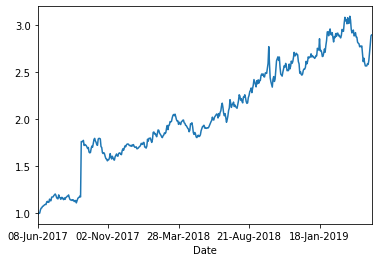

In [96]:
cumulative_returns = ( 1 + (reliance['Close Price'].pct_change() * reliance['action']) ).dropna().cumprod()
cumulative_returns.plot()

In [115]:
pvr_data=pd.read_csv("C:/Users/JAYANK/Desktop/aspiration ai internship/PVR.csv")

In [116]:
pvr_data=pvr_data[pvr_data.Series=='EQ']

In [117]:
pvr_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,PVR,EQ,07-May-2019,1802.30,1795.00,1802.15,1772.45,1780.00,1780.10,1790.60,298337,5.342028e+08,19285,66333,22.23
491,PVR,EQ,08-May-2019,1780.10,1775.10,1777.45,1742.00,1749.00,1748.50,1758.96,369364,6.496950e+08,23001,84617,22.91
492,PVR,EQ,09-May-2019,1748.50,1750.00,1769.25,1740.00,1764.00,1758.45,1757.26,341158,5.995022e+08,23934,66607,19.52
493,PVR,EQ,10-May-2019,1758.45,1772.00,1776.00,1696.70,1715.00,1715.40,1725.13,792063,1.366408e+09,34274,55503,7.01


In [118]:
pvr_data['pcoc']=pvr_data['Open Price']-pvr_data['Close Price']
pvr_data['pclh']=pvr_data['Low Price']-pvr_data['High Price']
pvr_data['5_day_rolling_mean']=pvr_data['Close Price'].rolling(5).mean()
pvr_data['5_day_rolling_std']=pvr_data['Close Price'].rolling(5).std()



In [119]:
pvr_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pcoc,pclh,5_day_rolling_mean,5_day_rolling_std
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58,7.40,-22.70,NaN,NaN
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09,-12.30,-18.35,NaN,NaN
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83,9.40,-26.80,NaN,NaN
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24,9.95,-37.15,NaN,NaN
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67,1.45,-32.30,1524.57,10.645105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,PVR,EQ,07-May-2019,1802.30,1795.00,1802.15,1772.45,1780.00,1780.10,1790.60,298337,5.342028e+08,19285,66333,22.23,14.90,-29.70,1792.99,17.172012
491,PVR,EQ,08-May-2019,1780.10,1775.10,1777.45,1742.00,1749.00,1748.50,1758.96,369364,6.496950e+08,23001,84617,22.91,26.60,-35.45,1788.80,25.084657
492,PVR,EQ,09-May-2019,1748.50,1750.00,1769.25,1740.00,1764.00,1758.45,1757.26,341158,5.995022e+08,23934,66607,19.52,-8.45,-29.25,1779.49,26.183306
493,PVR,EQ,10-May-2019,1758.45,1772.00,1776.00,1696.70,1715.00,1715.40,1725.13,792063,1.366408e+09,34274,55503,7.01,56.60,-79.30,1760.95,32.835195


In [120]:
pvr_data.dropna(axis=0,inplace=True)

In [121]:
pvr_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pcoc,pclh,5_day_rolling_mean,5_day_rolling_std
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67,1.45,-32.30,1524.57,10.645105
5,PVR,EQ,22-May-2017,1513.55,1498.45,1522.00,1397.05,1492.00,1481.00,1473.33,449726,6.625967e+08,29357,179657,39.95,17.45,-124.95,1515.78,22.165023
6,PVR,EQ,23-May-2017,1481.00,1492.00,1515.00,1445.50,1497.00,1496.45,1476.70,318619,4.705033e+08,9260,179663,56.39,-4.45,-69.50,1507.27,18.957406
7,PVR,EQ,24-May-2017,1496.45,1490.00,1530.05,1444.15,1452.00,1450.00,1484.30,107642,1.597726e+08,5923,33688,31.30,40.00,-85.90,1491.21,26.913691
8,PVR,EQ,25-May-2017,1450.00,1450.00,1474.75,1439.05,1474.75,1461.15,1456.94,114328,1.665689e+08,3930,53461,46.76,-11.15,-35.70,1480.43,25.746859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,PVR,EQ,07-May-2019,1802.30,1795.00,1802.15,1772.45,1780.00,1780.10,1790.60,298337,5.342028e+08,19285,66333,22.23,14.90,-29.70,1792.99,17.172012
491,PVR,EQ,08-May-2019,1780.10,1775.10,1777.45,1742.00,1749.00,1748.50,1758.96,369364,6.496950e+08,23001,84617,22.91,26.60,-35.45,1788.80,25.084657
492,PVR,EQ,09-May-2019,1748.50,1750.00,1769.25,1740.00,1764.00,1758.45,1757.26,341158,5.995022e+08,23934,66607,19.52,-8.45,-29.25,1779.49,26.183306
493,PVR,EQ,10-May-2019,1758.45,1772.00,1776.00,1696.70,1715.00,1715.40,1725.13,792063,1.366408e+09,34274,55503,7.01,56.60,-79.30,1760.95,32.835195


In [122]:
neural_network.predict(pvr_data[['pcoc','pclh','5_day_rolling_mean','5_day_rolling_std']])

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [123]:
random_forest=RandomForestClassifier(max_depth=5, n_estimators=10, max_features=max_features)

In [124]:
X=reliance[['pcopenclose','pclowhigh','5dayrollingmean','5dayrollingstd']]
y=reliance[['action']]

In [125]:
random_forest.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
action=random_forest.predict(pvr_data[['pcoc','pclh','5_day_rolling_mean','5_day_rolling_std']])

In [130]:
pvr_data['action']=action

In [131]:
pvr_data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,pcoc,pclh,5_day_rolling_mean,5_day_rolling_std,action
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67,1.45,-32.30,1524.57,10.645105,1
5,PVR,EQ,22-May-2017,1513.55,1498.45,1522.00,1397.05,1492.00,1481.00,1473.33,449726,6.625967e+08,29357,179657,39.95,17.45,-124.95,1515.78,22.165023,1
6,PVR,EQ,23-May-2017,1481.00,1492.00,1515.00,1445.50,1497.00,1496.45,1476.70,318619,4.705033e+08,9260,179663,56.39,-4.45,-69.50,1507.27,18.957406,-1
7,PVR,EQ,24-May-2017,1496.45,1490.00,1530.05,1444.15,1452.00,1450.00,1484.30,107642,1.597726e+08,5923,33688,31.30,40.00,-85.90,1491.21,26.913691,1
8,PVR,EQ,25-May-2017,1450.00,1450.00,1474.75,1439.05,1474.75,1461.15,1456.94,114328,1.665689e+08,3930,53461,46.76,-11.15,-35.70,1480.43,25.746859,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,PVR,EQ,07-May-2019,1802.30,1795.00,1802.15,1772.45,1780.00,1780.10,1790.60,298337,5.342028e+08,19285,66333,22.23,14.90,-29.70,1792.99,17.172012,-1
491,PVR,EQ,08-May-2019,1780.10,1775.10,1777.45,1742.00,1749.00,1748.50,1758.96,369364,6.496950e+08,23001,84617,22.91,26.60,-35.45,1788.80,25.084657,-1
492,PVR,EQ,09-May-2019,1748.50,1750.00,1769.25,1740.00,1764.00,1758.45,1757.26,341158,5.995022e+08,23934,66607,19.52,-8.45,-29.25,1779.49,26.183306,-1
493,PVR,EQ,10-May-2019,1758.45,1772.00,1776.00,1696.70,1715.00,1715.40,1725.13,792063,1.366408e+09,34274,55503,7.01,56.60,-79.30,1760.95,32.835195,-1
